In [75]:
import pandas as pd
import missingno as ms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=[FutureWarning,UserWarning])

The data is about car sales. The data includes 13columns. There is a name variable including names of the cars. The six of columns are categorical, and the six of them are numerical. Year is year in which car was sold, kmDriven is number of kilometers thatthe car is driven, seller_Type tells us whether car is sold by individual or dealer, and owner tells the number of previous owners. Source the data is https://www.kaggle.com/datasets/nehalbirla/vehicle
-dataset-from-cardekho?select=Car+details+v3.csv.

Veriler araba satışlarına ilişkindir. Veriler 13 sütun içermektedir. Arabaların isimlerini içeren bir name değişkeni var. Sütunların altısı kategorik, altısı ise sayısaldır. Year, arabanın satıldığı yılı, kmDriven arabanın kat ettiği kilometre sayısını, seller_Type bize arabanın şahıs tarafından mı yoksa bayi tarafından mı satıldığını ve owner bize önceki sahiplerin sayısını söyler. Verilerin kaynağı: https://www.kaggle.com/datasets/nehalbirla/vehicle
-dataset-from-cardekho?select=Araba+ayrıntılar+v3.csv.

In [76]:
data=pd.read_csv("C:/Users/ASUS/Desktop/MetehanHocaDDO/Car details v3(1).csv",na_values=[pd.NA,np.nan,'',' '])
data["mileage"]=data["mileage"].str.replace(" kmpl","")
data["mileage"]=data["mileage"].str.replace(" km/kg","").apply(float)
data["engine"]=data["engine"].str.replace(" CC","").apply(float)
data["engine"]=data["engine"].replace(" CC","").apply(str)
data["max_power"]=data["max_power"].str.replace(" bhp","")
data["max_power"]=data["max_power"].replace('',"0").apply(float)
data=data.drop("torque",axis=1)

In [77]:
data.loc[data.sample(frac=0.05).index, "fuel"] = np.nan

<Axes: >

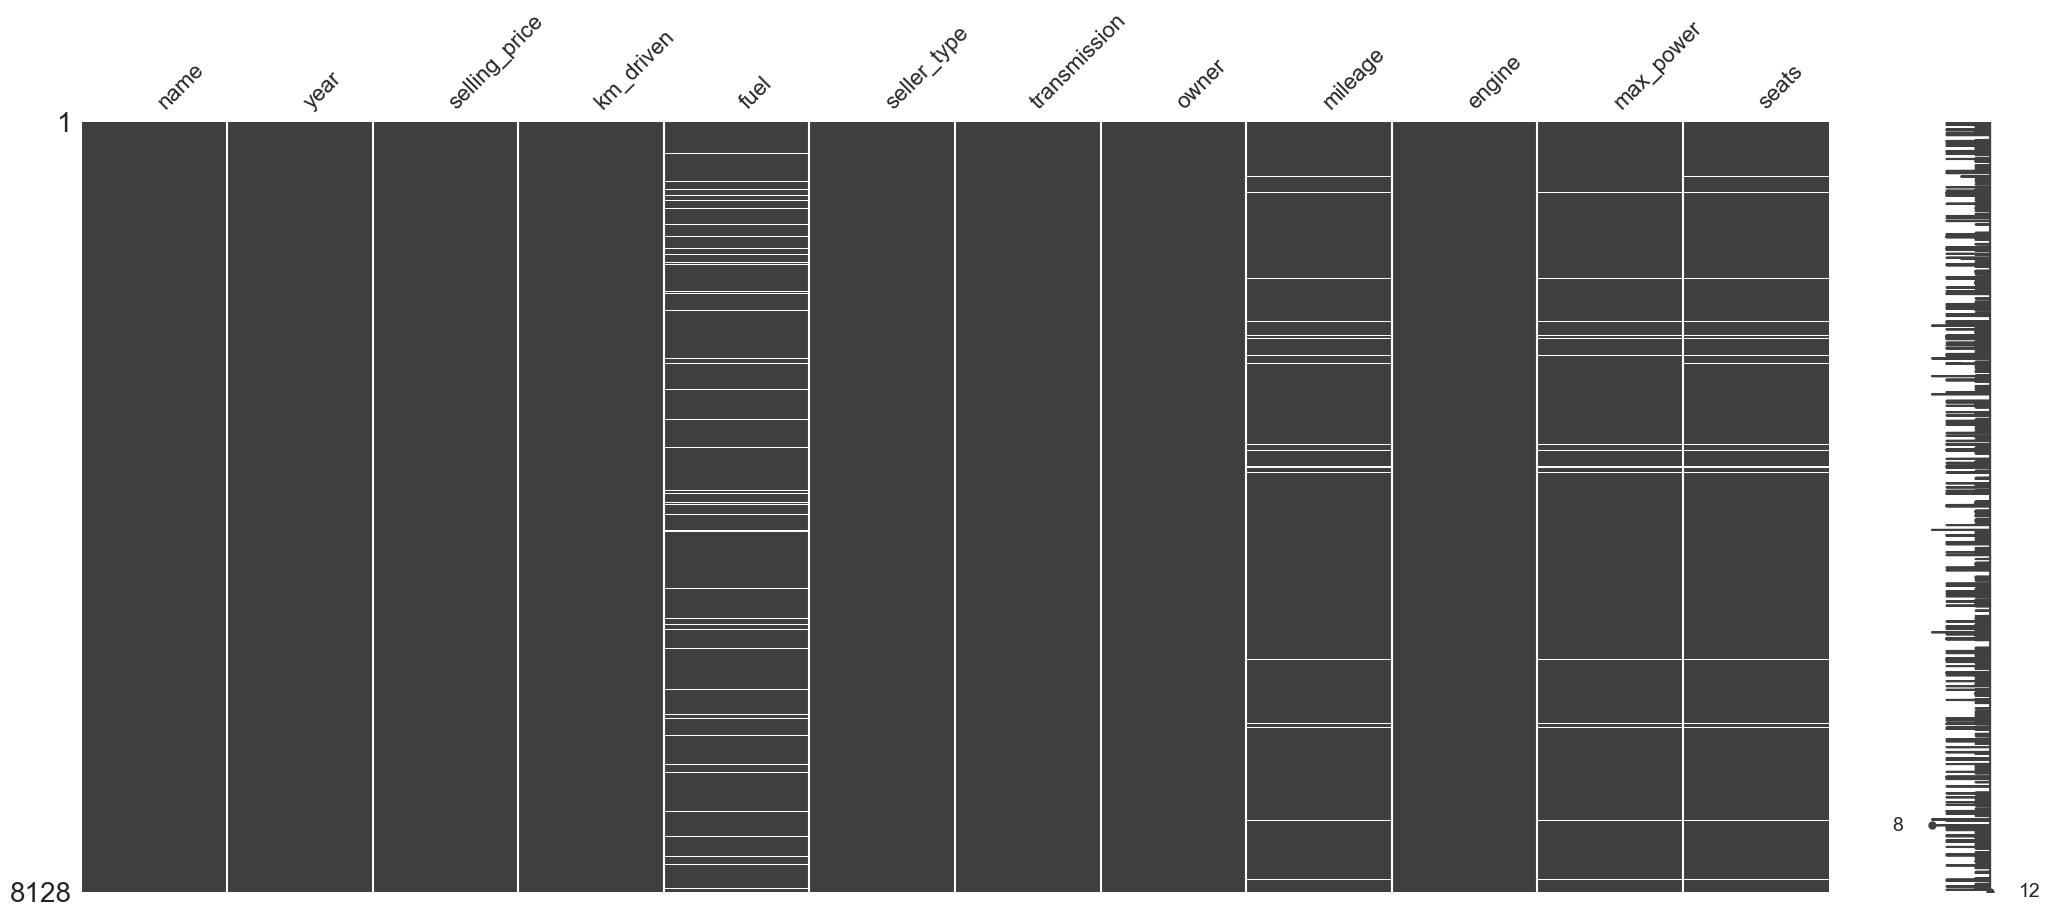

In [78]:
ms.matrix(data)

In [79]:
data=data[["year","selling_price","km_driven","fuel","mileage","engine","max_power","transmission","seats"]]

<Axes: >

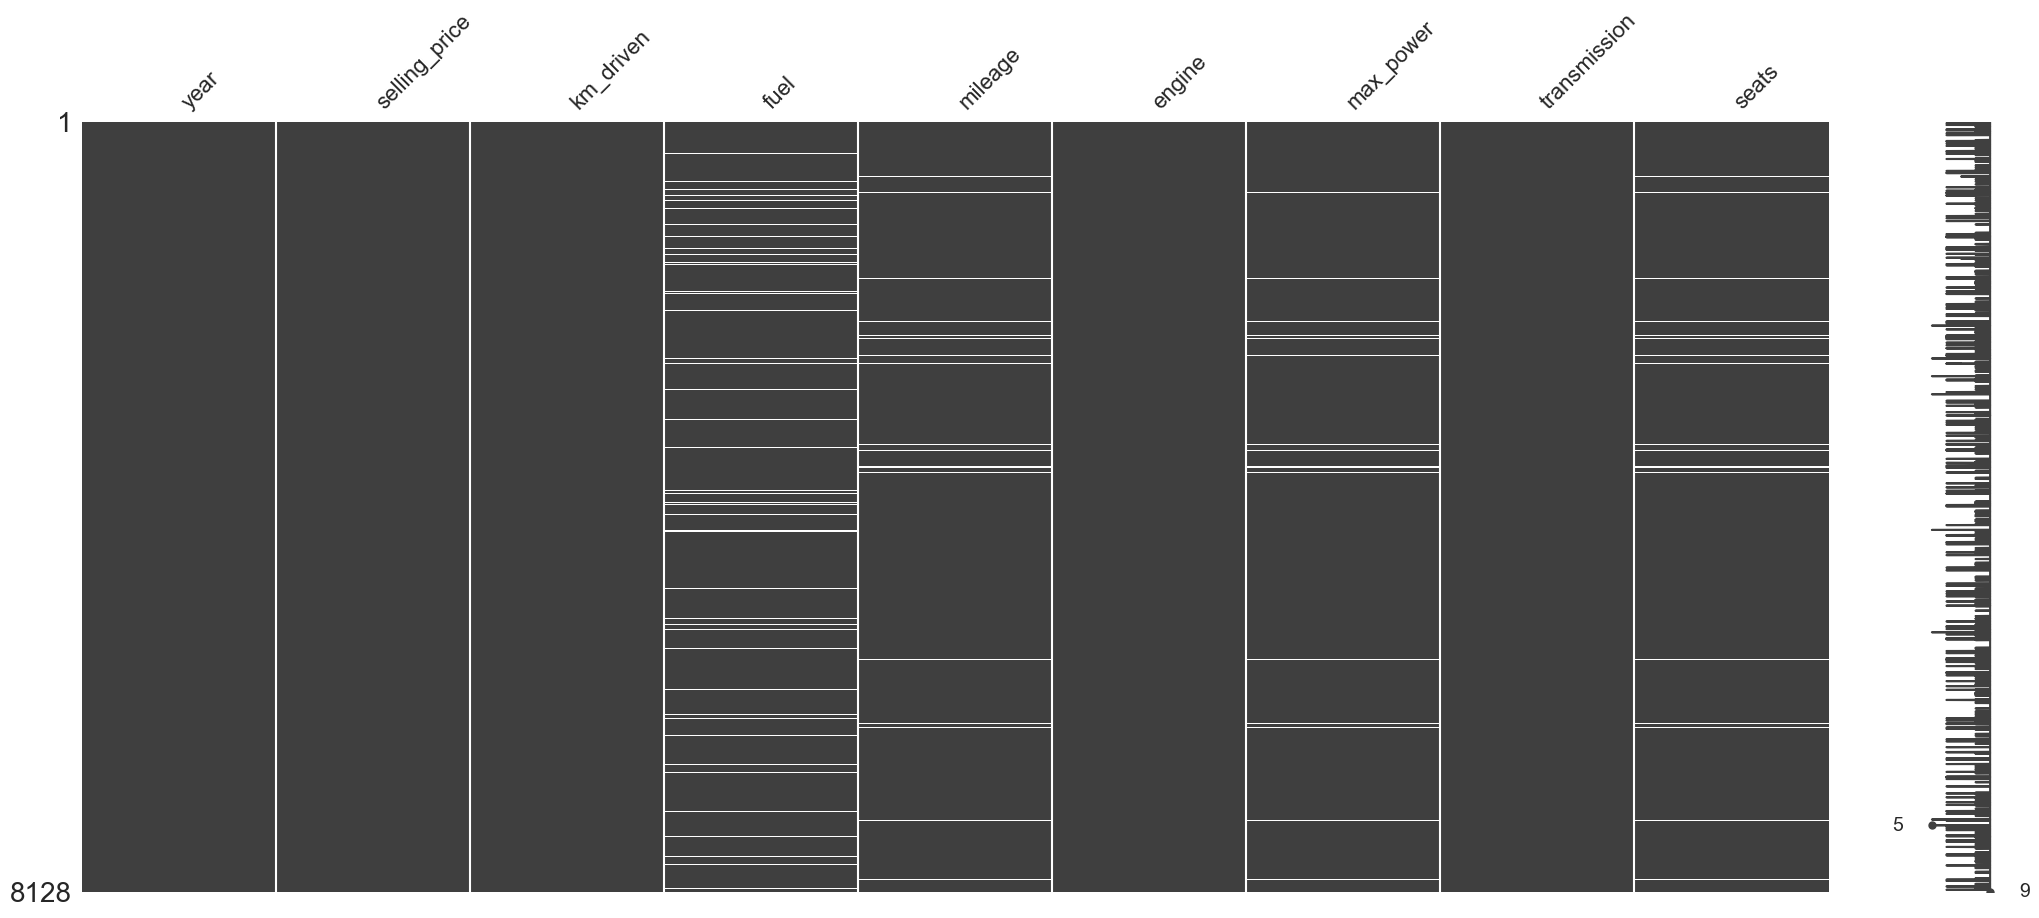

In [80]:
ms.matrix(data)

<Axes: >

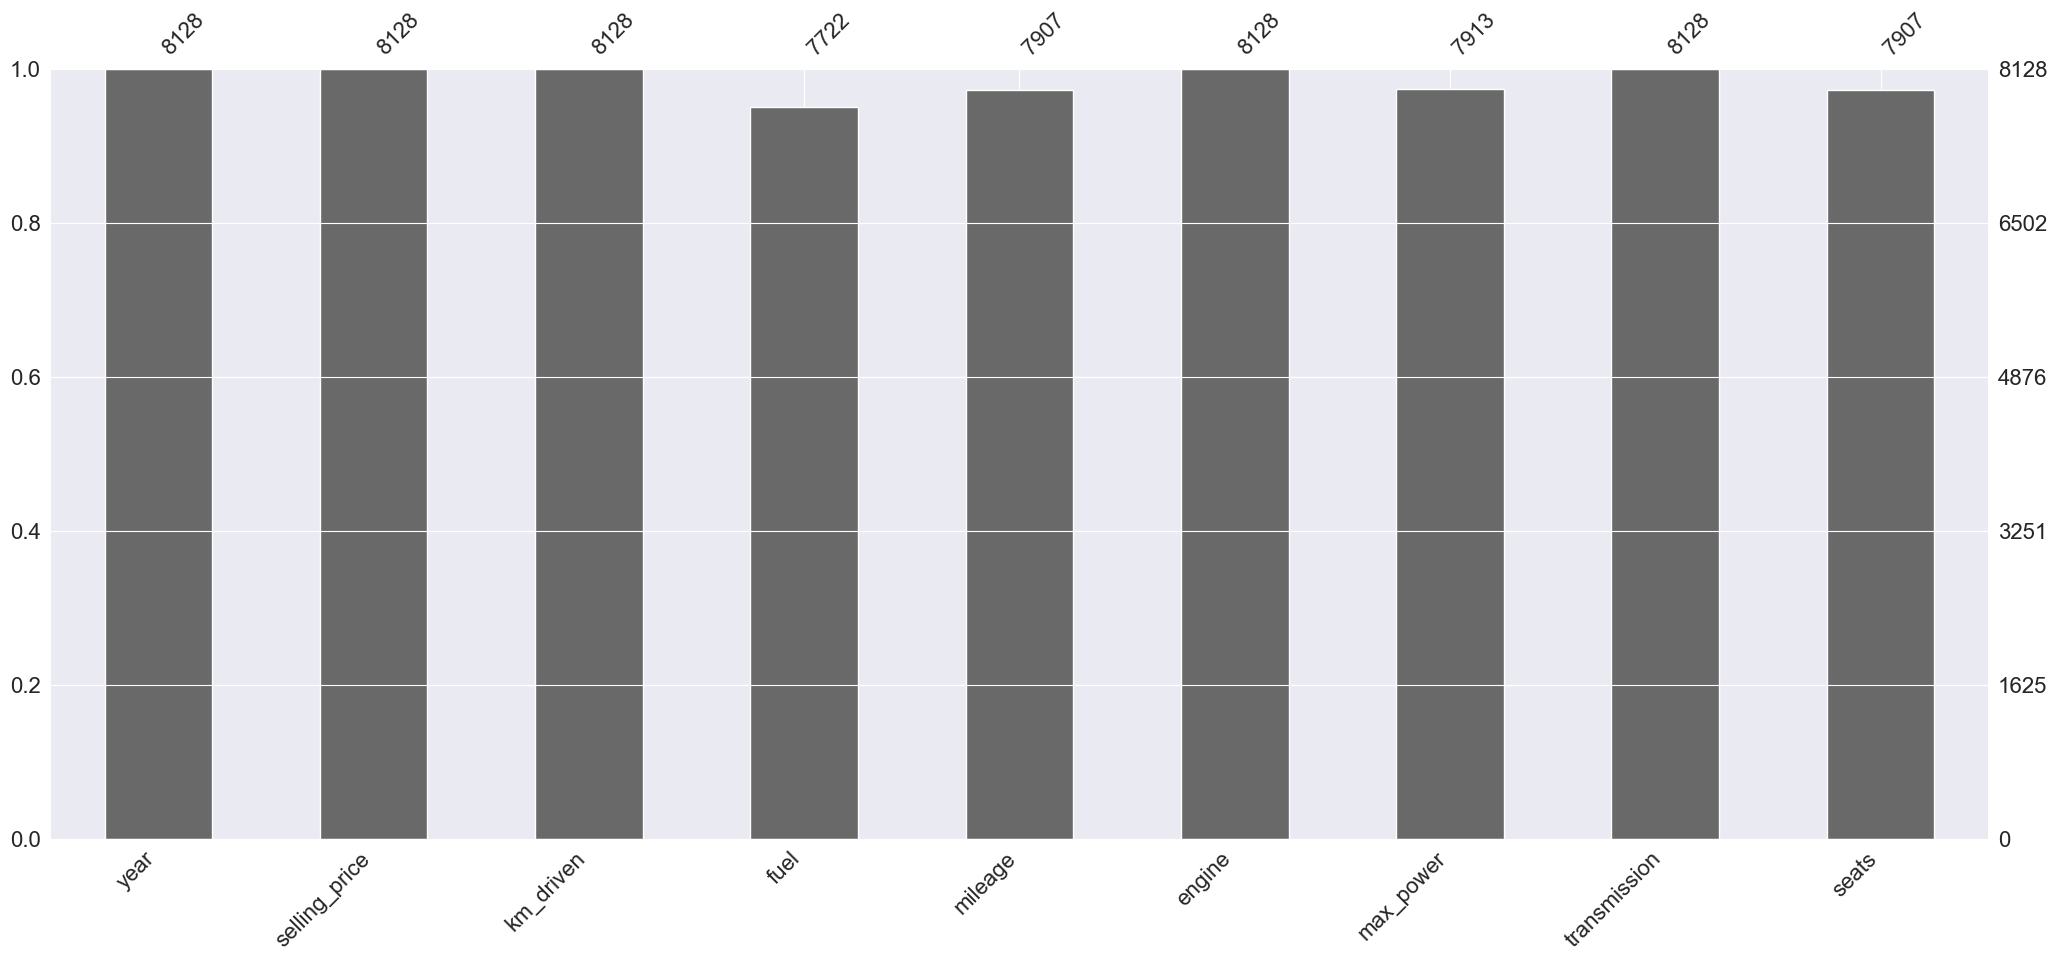

In [81]:
ms.bar(data)

In [82]:
df_numerics_only = data.select_dtypes(include=np.number)
df_numerics_only

,year,selling_price,km_driven,mileage,max_power,seats
0,2014,450000,145500,23.40,74.00,5.0
1,2014,370000,120000,21.14,103.52,5.0
2,2006,158000,140000,17.70,78.00,5.0
3,2010,225000,127000,23.00,90.00,5.0
4,2007,130000,120000,16.10,88.20,5.0
...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,82.85,5.0
8124,2007,135000,119000,16.80,110.00,5.0
8125,2009,382000,120000,19.30,73.90,5.0
8126,2013,290000,25000,23.57,70.00,5.0


In [83]:
dataImp=pd.DataFrame(data[["mileage","max_power","fuel","seats","transmission","selling_price"]])

Interpolation

Linear Interpolation

In [84]:
linInt=df_numerics_only.interpolate(method='linear')
linInt=pd.DataFrame(linInt[["mileage","max_power"]].to_numpy(),columns=[i+"linear" for i in ["mileage","max_power"]])
dataImp=pd.concat([dataImp,linInt],axis=1)

Quadratic Interpolation

In [85]:
QuaInt=df_numerics_only.interpolate(method='quadratic')
QuaInt=pd.DataFrame(QuaInt[["mileage","max_power"]].to_numpy(),columns=[i+"quadratic" for i in ["mileage","max_power"]])
dataImp=pd.concat([dataImp,QuaInt],axis=1)

Cubic Interpolation

In [86]:
cubicInt=df_numerics_only.interpolate(method='cubic')
cubicInt=pd.DataFrame(cubicInt[["mileage","max_power"]].to_numpy(),columns=[i+"cubic" for i in ["mileage","max_power"]])
dataImp=pd.concat([dataImp,cubicInt],axis=1)


Spline Interpolation

In [87]:
splineInt=df_numerics_only.interpolate(method='spline',order=2)
splineInt=pd.DataFrame(splineInt[["mileage","max_power"]].to_numpy(),columns=[i+"spline" for i in ["mileage","max_power"]])
dataImp=pd.concat([dataImp,splineInt],axis=1)

BackFill

In [88]:
bfill=data.bfill()
bfill=pd.DataFrame(bfill[["mileage","max_power","fuel"]].to_numpy(),columns=[i+"bfill" for i in ["mileage","max_power","fuel"]])
dataImp=pd.concat([dataImp,bfill],axis=1)



Forward fill

In [89]:
ffill=data.ffill()
ffill=pd.DataFrame(ffill[["mileage","max_power","fuel"]].to_numpy(),columns=[i+"ffill" for i in ["mileage","max_power","fuel"]])
dataImp=pd.concat([dataImp,ffill],axis=1)


Nearest Interpolation

In [90]:
nearestInt=df_numerics_only.interpolate(method='nearest')
nearestInt=pd.DataFrame(nearestInt[["mileage","max_power"]].to_numpy(),columns=[i+"nearest" for i in ["mileage","max_power"]])
dataImp=pd.concat([dataImp,nearestInt],axis=1)


Mean

In [91]:
import numpy as np

from sklearn.impute import SimpleImputer
averaging=SimpleImputer(strategy="mean")
averaging.fit(df_numerics_only)
meanData=averaging.transform(df_numerics_only)

In [92]:
meanData=pd.DataFrame(meanData,columns=df_numerics_only.columns)
meanData=pd.DataFrame(meanData[["mileage","max_power"]].to_numpy(),columns=[i+"mean" for i in ["mileage","max_power"]])
dataImp=pd.concat([dataImp,meanData],axis=1)

MostFrequent

In [93]:

mostFreq=SimpleImputer(strategy="most_frequent")
mostFreq.fit(data)
mostFreqData=mostFreq.transform(data)
mostFreqData=pd.DataFrame(mostFreqData,columns=data.columns)
mostFreqData=pd.DataFrame(mostFreqData[["mileage","max_power","seats","fuel"]].to_numpy(),columns=[i+"mostFreqData" for i in ["mileage","max_power","seats","fuel"]])
dataImp=pd.concat([dataImp,mostFreqData],axis=1)


Median

In [94]:

mostFreq=SimpleImputer(strategy="median")
mostFreq.fit(df_numerics_only)
mostFreqData=mostFreq.transform(df_numerics_only)
mostFreqData=pd.DataFrame(mostFreqData,columns=df_numerics_only.columns)
mostFreqData=pd.DataFrame(mostFreqData[["mileage","max_power"]].to_numpy(),columns=[i+"median" for i in ["mileage","max_power"]])
dataImp=pd.concat([dataImp,mostFreqData],axis=1)

Constant

In [95]:

mostFreq=SimpleImputer(strategy="constant")
mostFreq.fit(data)
mostFreqData=mostFreq.transform(data)
mostFreqData=pd.DataFrame(mostFreqData,columns=data.columns)
mostFreqData=pd.DataFrame(mostFreqData[["fuel"]].to_numpy(),columns=[i+"constantmv" for i in ["fuel"]])
dataImp=pd.concat([dataImp,mostFreqData],axis=1)

In [96]:

mostFreq=SimpleImputer(strategy="constant",fill_value=0)
mostFreq.fit(data)
mostFreqData=mostFreq.transform(data)
mostFreqData=pd.DataFrame(mostFreqData,columns=data.columns)
mostFreqData=pd.DataFrame(mostFreqData[["mileage","max_power"]].to_numpy(),columns=[i+"constantzero" for i in ["mileage","max_power"]])
dataImp=pd.concat([dataImp,mostFreqData],axis=1)

Iterative Imputer

In [97]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

itImp=IterativeImputer(max_iter=10,random_state=0)
itImp.fit(df_numerics_only)
itImpData=itImp.transform(df_numerics_only)
itImpData=pd.DataFrame(itImpData,columns=df_numerics_only.columns)
itImpData=pd.DataFrame(itImpData[["mileage","max_power"]].to_numpy(),columns=[i+"iterative" for i in ["mileage","max_power"]])
dataImp=pd.concat([dataImp,itImpData],axis=1)

Grouping-mean

In [98]:


new_data=data[["max_power","mileage",'transmission']].groupby(by="transmission").apply(lambda x: x.fillna(x.mean()))
new_data=pd.DataFrame(new_data[["max_power","mileage"]].to_numpy(),columns=[i+"grouping-mean" for i in ["max_power","mileage"]])
dataImp=pd.concat([dataImp,new_data],axis=1)

Grouping median


In [99]:

new_data=data[["max_power","mileage",'transmission']].groupby(by="transmission").apply(lambda x: x.fillna(x.median()))
new_data=pd.DataFrame(new_data[["max_power","mileage"]].to_numpy(),columns=[i+"grouping-median" for i in ["max_power","mileage"]])
dataImp=pd.concat([dataImp,new_data],axis=1)

grouping-mode

In [100]:
new_data=dataImp["fuel"]
new_dataGroups=data[["fuel","transmission"]].groupby(by='transmission')
mods=new_dataGroups["fuel"].transform(lambda x: x.mode()[0])
new_data=new_data.fillna(mods)
new_data=pd.DataFrame(new_data.to_numpy(),columns=[i+"grouping_mode" for i in ["fuel"]])
dataImp=pd.concat([dataImp,new_data],axis=1)

new_data=dataImp["seats"]

new_dataGroups=data[["seats","transmission"]].groupby(by='transmission')
mods=new_dataGroups["seats"].transform(lambda x: x.mode()[0])
new_data=new_data.fillna(mods)
new_data=pd.DataFrame(new_data.to_numpy(),columns=[i+"grouping_mode" for i in ["seats"]])
dataImp=pd.concat([dataImp,new_data],axis=1)




Plots

<Axes: >

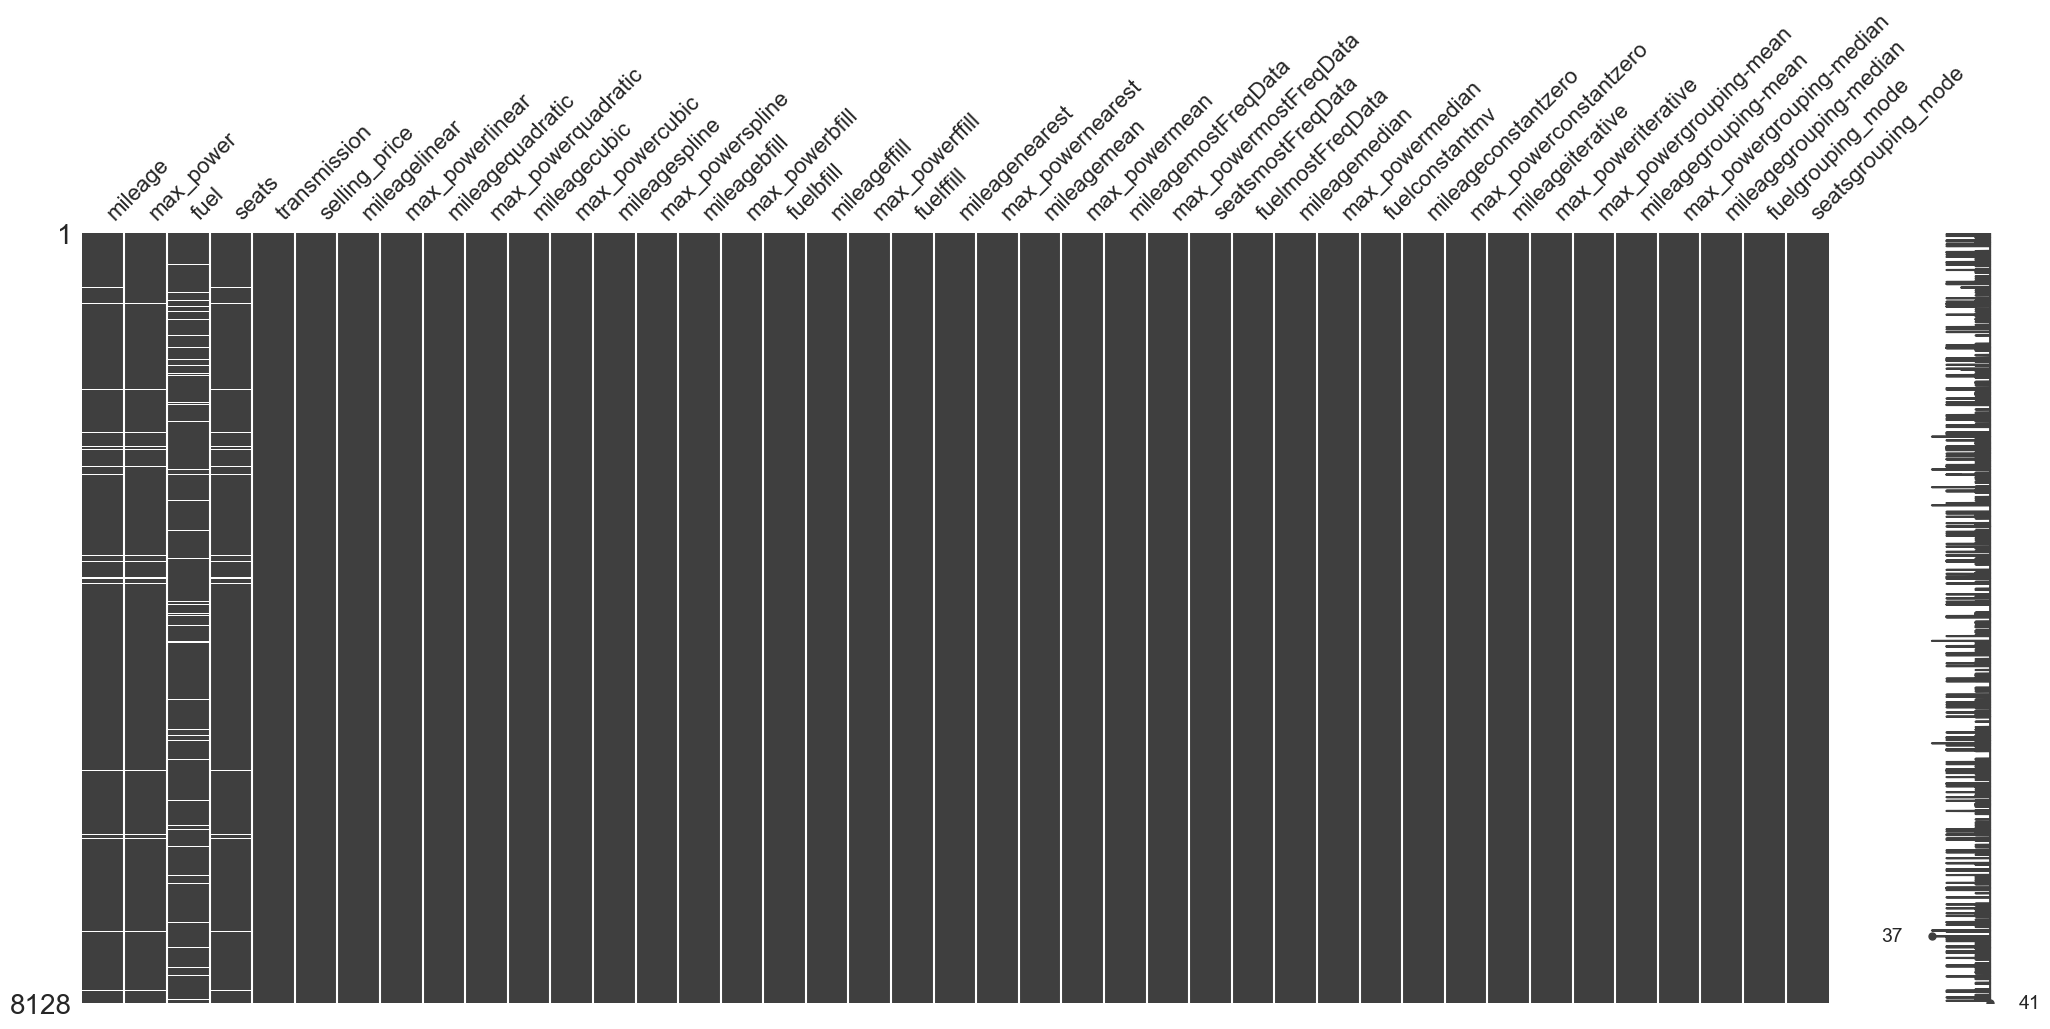

In [101]:
ms.matrix(dataImp)

<Axes: >

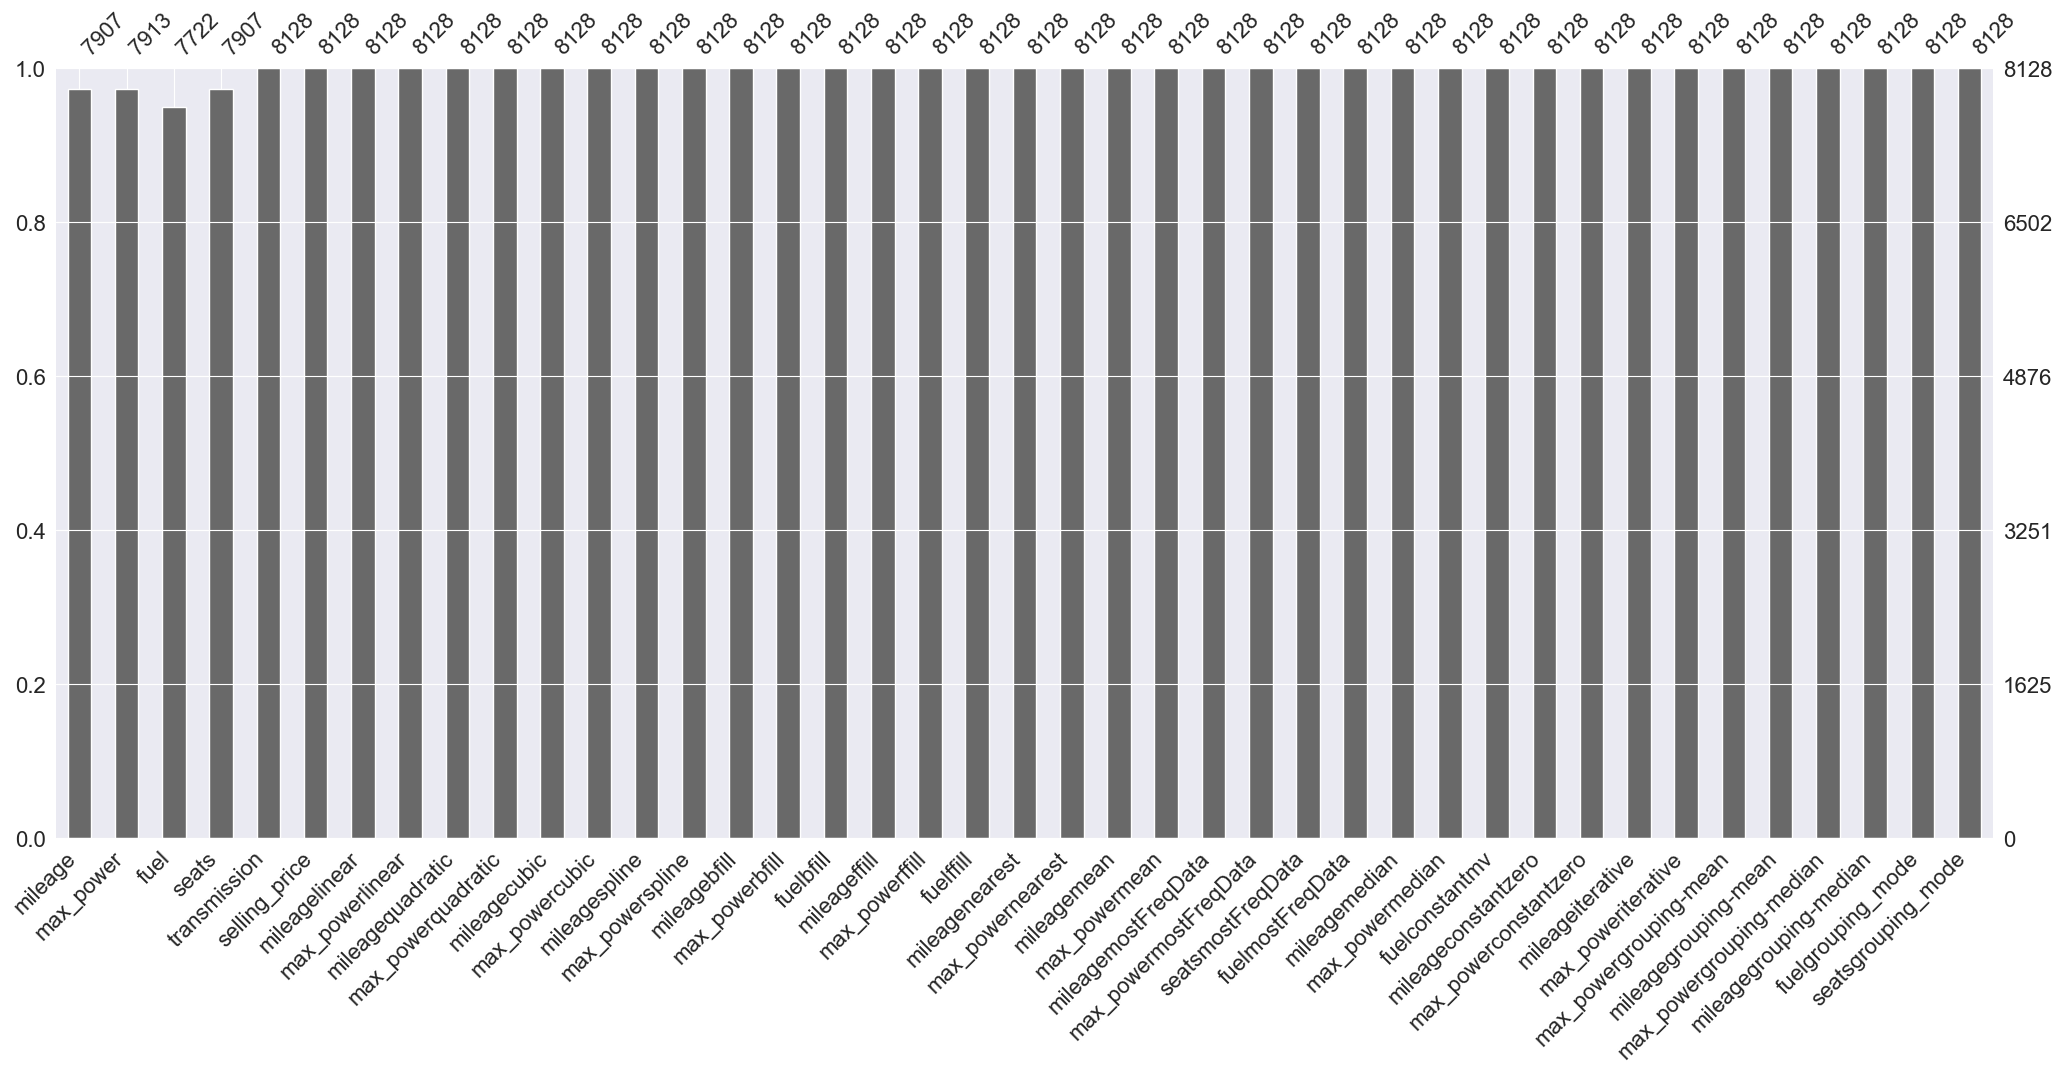

In [102]:
ms.bar(dataImp)

[Text(0.5, 1.0, 'Plot of  Max Power(Mode)'), Text(0.5, 0, 'Max Power(bhp)')]

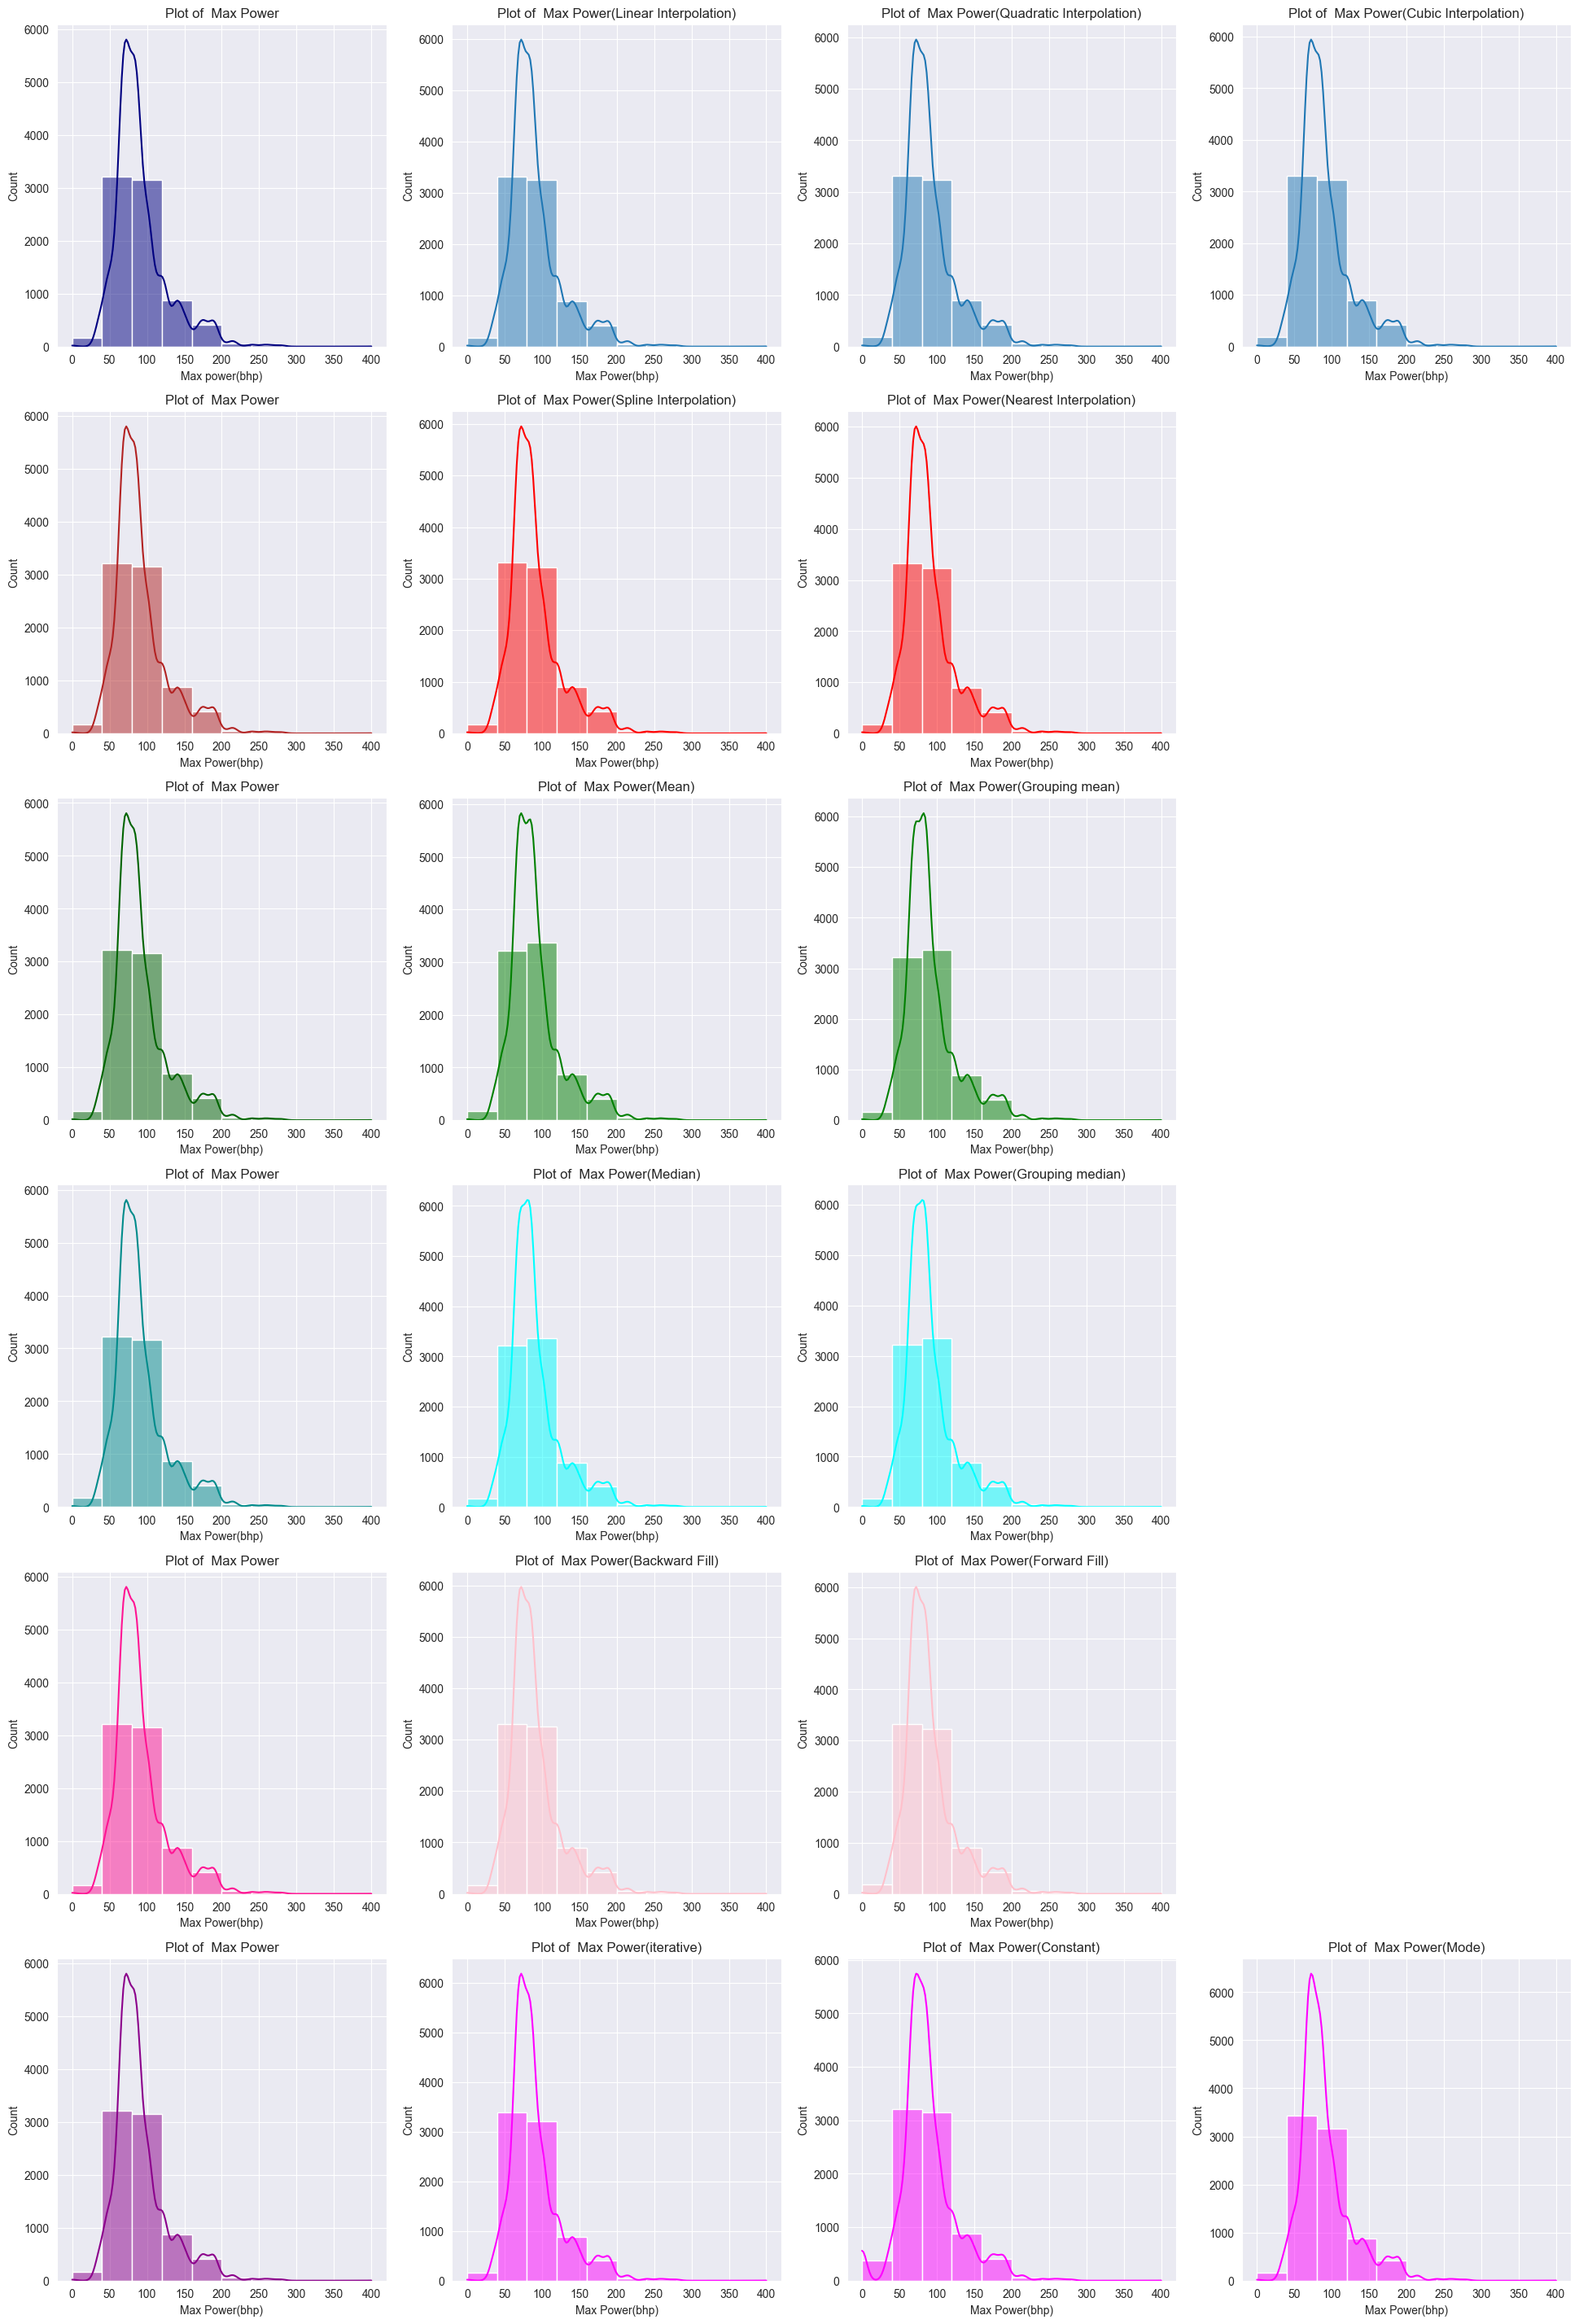

In [103]:
plt.rcParams["figure.figsize"] = (24,36)
fig, axs = plt.subplots(nrows=6, ncols=4)

sns.histplot(dataImp["max_power"],bins=10,kde=True,ax=axs[0,0],alpha=0.5,edgecolor=None,color="navy").set(title="Plot of  Max Power",xlabel="Max power(bhp)")
sns.histplot(dataImp["max_powerlinear"],bins=10,kde=True,ax=axs[0,1],alpha=0.5,edgecolor=None).set(title="Plot of  Max Power(Linear Interpolation)",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_powerquadratic"],bins=10,kde=True,ax=axs[0,2],alpha=0.5,edgecolor=None).set(title="Plot of  Max Power(Quadratic Interpolation)",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_powercubic"],bins=10,kde=True,ax=axs[0,3],alpha=0.5,edgecolor=None).set(title="Plot of  Max Power(Cubic Interpolation)",xlabel="Max Power(bhp)")


sns.histplot(dataImp["max_power"],bins=10,kde=True,ax=axs[1,0],alpha=0.5,edgecolor=None,color="firebrick").set(title="Plot of  Max Power",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_powerspline"],bins=10,kde=True,ax=axs[1,1],alpha=0.5,edgecolor=None,color="red").set(title="Plot of  Max Power(Spline Interpolation)",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_powernearest"],bins=10,kde=True,ax=axs[1,2],alpha=0.5,edgecolor=None,color="red").set(title="Plot of  Max Power(Nearest Interpolation)",xlabel="Max Power(bhp)")
fig.delaxes(axs[1][3])



sns.histplot(dataImp["max_power"],bins=10,kde=True,ax=axs[2,0],alpha=0.5,edgecolor=None,color="darkgreen").set(title="Plot of  Max Power",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_powermean"],bins=10,kde=True,ax=axs[2,1],alpha=0.5,edgecolor=None,color="green").set(title="Plot of  Max Power(Mean)",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_powergrouping-mean"],bins=10,kde=True,ax=axs[2,2],alpha=0.5,edgecolor=None,color="green").set(title="Plot of  Max Power(Grouping mean)",xlabel="Max Power(bhp)")
fig.delaxes(axs[2][3])

sns.histplot(dataImp["max_power"],bins=10,kde=True,ax=axs[3,0],alpha=0.5,edgecolor=None,color="darkcyan").set(title="Plot of  Max Power",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_powermedian"],bins=10,kde=True,ax=axs[3,1],alpha=0.5,edgecolor=None,color="cyan").set(title="Plot of  Max Power(Median)",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_powergrouping-median"],bins=10,kde=True,ax=axs[3,2],alpha=0.5,edgecolor=None,color="cyan").set(title="Plot of  Max Power(Grouping median)",xlabel="Max Power(bhp)")
fig.delaxes(axs[3][3])

sns.histplot(dataImp["max_power"],bins=10,kde=True,ax=axs[4,0],alpha=0.5,edgecolor=None,color="deeppink").set(title="Plot of  Max Power",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_powerbfill"],bins=10,kde=True,ax=axs[4,1],alpha=0.5,edgecolor=None,color="pink").set(title="Plot of  Max Power(Backward Fill)",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_powerffill"],bins=10,kde=True,ax=axs[4,2],alpha=0.5,edgecolor=None,color="pink").set(title="Plot of  Max Power(Forward Fill)",xlabel="Max Power(bhp)")
fig.delaxes(axs[4][3])



sns.histplot(dataImp["max_power"],bins=10,kde=True,ax=axs[5,0],alpha=0.5,edgecolor=None,color="darkmagenta").set(title="Plot of  Max Power",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_poweriterative"],bins=10,kde=True,ax=axs[5,1],alpha=0.5,edgecolor=None,color="magenta").set(title="Plot of  Max Power(iterative)",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_powerconstantzero"],bins=10,kde=True,ax=axs[5,2],alpha=0.5,edgecolor=None,color="magenta").set(title="Plot of  Max Power(Constant)",xlabel="Max Power(bhp)")
sns.histplot(dataImp["max_powermostFreqData"],bins=10,kde=True,ax=axs[5,3],alpha=0.5,edgecolor=None,color="magenta").set(title="Plot of  Max Power(Mode)",xlabel="Max Power(bhp)")



[Text(0.5, 1.0, 'Plot of  Mileage(Mode)'), Text(0.5, 0, 'Mileage(kpml)')]

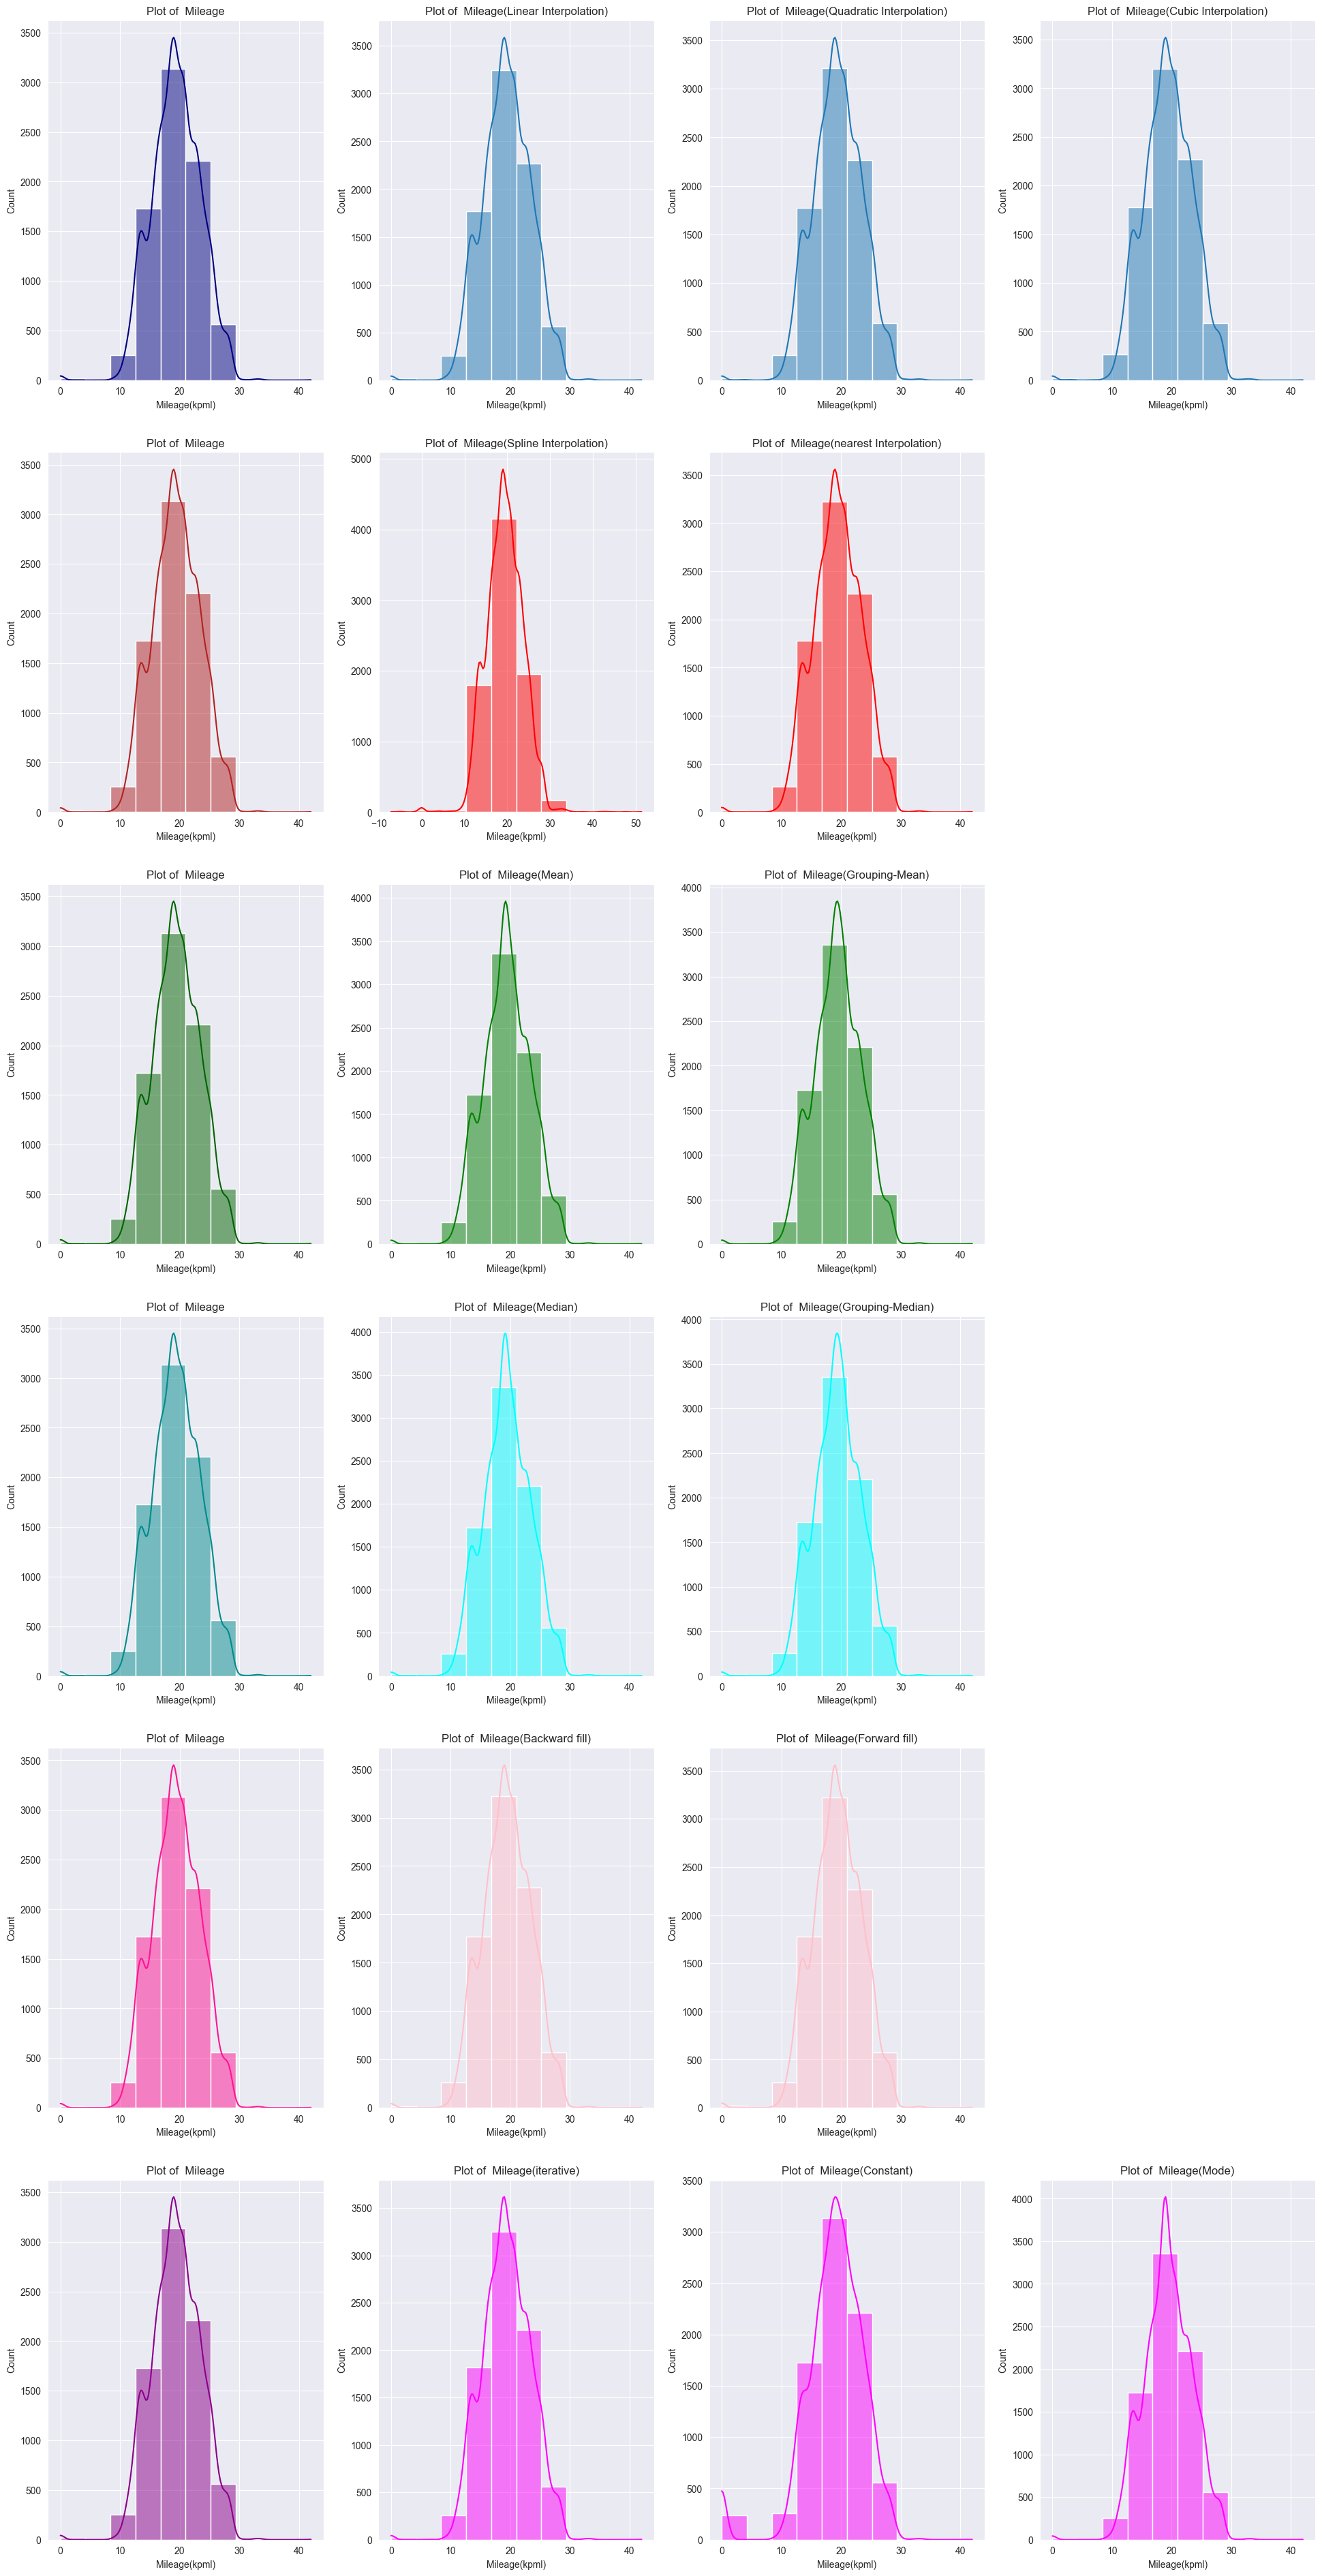

In [104]:
plt.rcParams["figure.figsize"] = (24,48)
fig, axs = plt.subplots(nrows=6, ncols=4)
sns.histplot(dataImp["mileage"],bins=10,kde=True,ax=axs[0,0],alpha=0.5,edgecolor=None,color="navy").set(title="Plot of  Mileage",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileagelinear"],bins=10,kde=True,ax=axs[0,1],alpha=0.5,edgecolor=None).set(title="Plot of  Mileage(Linear Interpolation)",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileagequadratic"],bins=10,kde=True,ax=axs[0,2],alpha=0.5,edgecolor=None).set(title="Plot of  Mileage(Quadratic Interpolation)",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileagecubic"],bins=10,kde=True,ax=axs[0,3],alpha=0.5,edgecolor=None).set(title="Plot of  Mileage(Cubic Interpolation)",xlabel="Mileage(kpml)")


sns.histplot(dataImp["mileage"],bins=10,kde=True,ax=axs[1,0],alpha=0.5,edgecolor=None,color="firebrick").set(title="Plot of  Mileage",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileagespline"],bins=10,kde=True,ax=axs[1,1],alpha=0.5,edgecolor=None,color="red").set(title="Plot of  Mileage(Spline Interpolation)",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileagenearest"],bins=10,kde=True,ax=axs[1,2],alpha=0.5,edgecolor=None,color="red").set(title="Plot of  Mileage(nearest Interpolation)",xlabel="Mileage(kpml)")
fig.delaxes(axs[1][3])



sns.histplot(dataImp["mileage"],bins=10,kde=True,ax=axs[2,0],alpha=0.5,edgecolor=None,color="darkgreen").set(title="Plot of  Mileage",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileagemean"],bins=10,kde=True,ax=axs[2,1],alpha=0.5,edgecolor=None,color="green").set(title="Plot of  Mileage(Mean)",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileagegrouping-mean"],bins=10,kde=True,ax=axs[2,2],alpha=0.5,edgecolor=None,color="green").set(title="Plot of  Mileage(Grouping-Mean)",xlabel="Mileage(kpml)")
fig.delaxes(axs[2][3])

sns.histplot(dataImp["mileage"],bins=10,kde=True,ax=axs[3,0],alpha=0.5,edgecolor=None,color="darkcyan").set(title="Plot of  Mileage",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileagemedian"],bins=10,kde=True,ax=axs[3,1],alpha=0.5,edgecolor=None,color="cyan").set(title="Plot of  Mileage(Median)",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileagegrouping-median"],bins=10,kde=True,ax=axs[3,2],alpha=0.5,edgecolor=None,color="cyan").set(title="Plot of  Mileage(Grouping-Median)",xlabel="Mileage(kpml)")
fig.delaxes(axs[3][3])

sns.histplot(dataImp["mileage"],bins=10,kde=True,ax=axs[4,0],alpha=0.5,edgecolor=None,color="deeppink").set(title="Plot of  Mileage",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileagebfill"],bins=10,kde=True,ax=axs[4,1],alpha=0.5,edgecolor=None,color="pink").set(title="Plot of  Mileage(Backward fill)",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileageffill"],bins=10,kde=True,ax=axs[4,2],alpha=0.5,edgecolor=None,color="pink").set(title="Plot of  Mileage(Forward fill)",xlabel="Mileage(kpml)")
fig.delaxes(axs[4][3])

sns.histplot(dataImp["mileage"],bins=10,kde=True,ax=axs[5,0],alpha=0.5,edgecolor=None,color="darkmagenta").set(title="Plot of  Mileage",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileageiterative"],bins=10,kde=True,ax=axs[5,1],alpha=0.5,edgecolor=None,color="magenta").set(title="Plot of  Mileage(iterative)",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileageconstantzero"],bins=10,kde=True,ax=axs[5,2],alpha=0.5,edgecolor=None,color="magenta").set(title="Plot of  Mileage(Constant)",xlabel="Mileage(kpml)")
sns.histplot(dataImp["mileagemostFreqData"],bins=10,kde=True,ax=axs[5,3],alpha=0.5,edgecolor=None,color="magenta").set(title="Plot of  Mileage(Mode)",xlabel="Mileage(kpml)")



[Text(0.5, 1.0, 'Plot of  Seats(Grouping-Mode)'),
 Text(0.5, 0, 'Number of seats')]

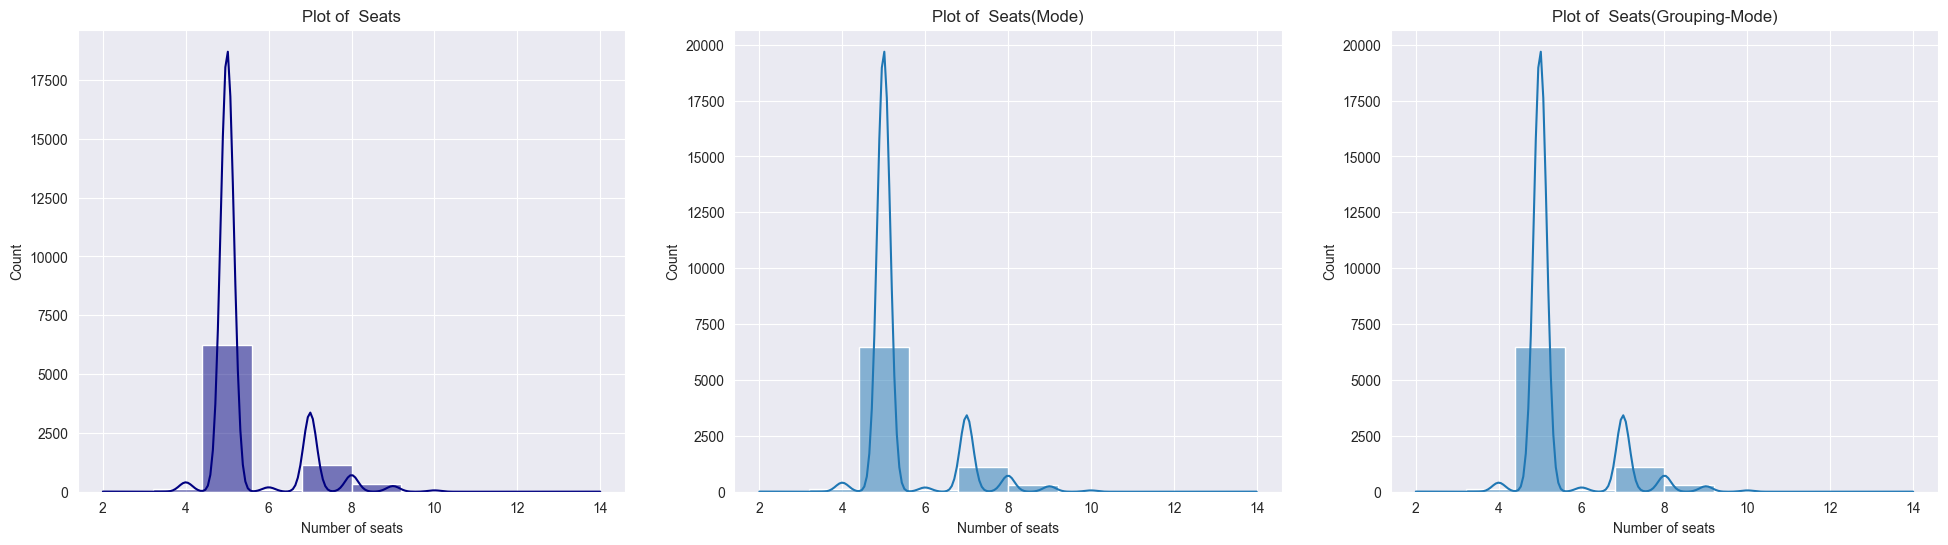

In [105]:
plt.rcParams["figure.figsize"] = (24,6)
fig, axs = plt.subplots(nrows=1, ncols=3)

sns.histplot(dataImp["seats"],bins=10,kde=True,ax=axs[0],alpha=0.5,edgecolor=None,color="navy").set(title="Plot of  Seats",xlabel="Number of seats")
sns.histplot(dataImp["seatsmostFreqData"],bins=10,kde=True,ax=axs[1],alpha=0.5,edgecolor=None).set(title="Plot of  Seats(Mode)",xlabel="Number of seats")
sns.histplot(dataImp["seatsgrouping_mode"],bins=10,kde=True,ax=axs[2],alpha=0.5,edgecolor=None).set(title="Plot of  Seats(Grouping-Mode)",xlabel="Number of seats")




Tests & Tables

In [106]:
cMileage=[]
cMP=[]
cseats=[]
chi=[]
for i in dataImp.columns:
    if "mileage" in i:
        cMileage.append(i)
    elif "max_power" in i:
        cMP.append(i)   
    elif "seats" in i:
        cseats.append(i) 
    elif "fuel" in i:
        chi.append(i) 


In [107]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
anovaT=pd.DataFrame(columns=["Statistic","p-value"])

for i in range(0, len(chi)):
    model = ols('selling_price ~ '+chi[i],data = dataImp).fit()
    anova_result = sm.stats.anova_lm(model, typ=2)
    p=anova_result["PR(>F)"].iloc[0]
    s=anova_result["F"].iloc[0]
    anovaT.loc[len(anovaT.index)]={"Statistic":s,"p-value":p}
anovaT.index=chi

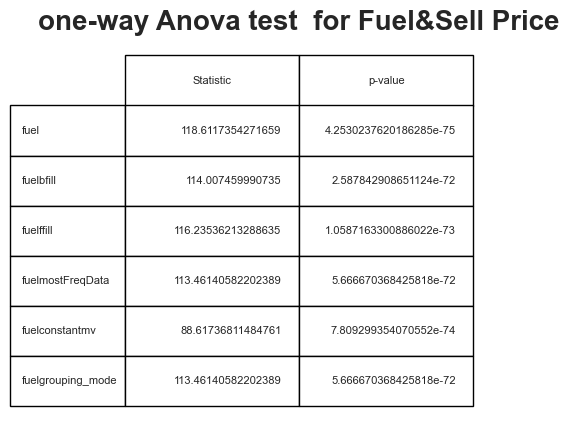

In [108]:
plt.rcParams["figure.figsize"] = (5,5)
fix, ax = plt.subplots(nrows=1, ncols=1)
ax.axis("off")
ax.axis('tight')
ax.set_title("one-way Anova test  for Fuel&Sell Price", weight='bold',fontsize=20)
ax.table(cellText=anovaT.to_numpy(),rowLabels=anovaT.index.tolist(),colLabels=anovaT.columns.tolist(),loc='center').scale(0.9,3)

one-way ANOVA teste göre selling pricedaki fuel levellerinin etkisi en çok orjinal datasettedir. Ondan sonra hem p-valueları hem de test istatistikleri eşit olan mod ve gruplayarak mod teknikleri ile impute edilmiş fuel değişkeni en iyi sonucu vermiş. En kötü sonuç ise Backward tekniği ile imputeda ortaya çıkmış. 

In [113]:
MileageScoreKS=pd.DataFrame(columns=["Statistic","p-value"])
for i in range(1, len(cMileage)):
    MileageScoreKS=pd.concat(([MileageScoreKS,pd.DataFrame({"Statistic":round(stats.ks_2samp(dataImp["mileage"].dropna(),dataImp[cMileage[i]])[0],4),"p-value":round(stats.ks_2samp(dataImp["mileage"].dropna(),dataImp[cMileage[i]])[1],4)},index=[cMileage[i]])]))
mannwhitneyuMileage=pd.DataFrame(columns=["Statistic","p-value"])
for i in range(1, len(cMileage)):
    mannwhitneyuMileage=pd.concat([mannwhitneyuMileage,pd.DataFrame({"Statistic":round(stats.mannwhitneyu(dataImp["mileage"].dropna().tolist(),dataImp[cMileage[i]].tolist())[0],4),"p-value":round(stats.mannwhitneyu(dataImp["mileage"].dropna().tolist(),dataImp[cMileage[i]].tolist())[1],4)},index=[cMileage[i]])])
cramervonmises_2sampMileage=pd.DataFrame(columns=["Statistic","p-value"])
for i in range(1, len(cMileage)):
    cramervonmises_2sampMileage=pd.concat([cramervonmises_2sampMileage,pd.DataFrame({"Statistic":round(stats.cramervonmises_2samp(dataImp["mileage"].dropna().tolist(),dataImp[cMileage[i]].tolist()).statistic,4),"p-value":round(stats.cramervonmises_2samp(dataImp["mileage"].dropna().tolist(),dataImp[cMileage[i]].tolist()).pvalue,4)},index=[cMileage[i]])])
anderson_ksampMileage=pd.DataFrame(columns=["Statistic","p-value"])
for i in range(1, len(cMileage)):
    anderson_ksampMileage=pd.concat([anderson_ksampMileage,pd.DataFrame({"Statistic":round(stats.anderson_ksamp([dataImp["mileage"].dropna(),dataImp[cMileage[i]]]).statistic,4),"p-value":round(stats.anderson_ksamp([dataImp["mileage"].dropna(),dataImp[cMileage[i]]]).pvalue,4)},index=[cMileage[i]])])


TypeError: issubclass() arg 2 must be a class, a tuple of classes, or a union

In [ ]:

plt.rcParams["figure.figsize"] = (30,30)
fix, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].axis("off")
ax[0][0].axis('tight')
ax[0][0].set_title("Two-sample Kolmogorov–Smirnov test (two-sided) for Mileage", weight='bold',fontsize=20)
ax[0][0].table(cellText=MileageScoreKS.to_numpy(),rowLabels=MileageScoreKS.index.tolist(),colLabels=MileageScoreKS.columns.tolist(),loc='center').scale(0.9,3)


ax[0][1].axis("off")
ax[0][1].axis('tight')
ax[0][1].set_title("Mann-Whitney U Test for Mileage", weight='bold',fontsize=20)
ax[0][1].table(cellText=mannwhitneyuMileage.to_numpy(),rowLabels=mannwhitneyuMileage.index.tolist(),colLabels=mannwhitneyuMileage.columns.tolist(),loc='center').scale(0.9,3)


ax[1][0].axis("off")
ax[1][0].axis('tight')
ax[1][0].set_title("Two-sample Cramér–von Mises test for Mileage", weight='bold',fontsize=20)
ax[1][0].table(cellText=cramervonmises_2sampMileage.to_numpy(),rowLabels=cramervonmises_2sampMileage.index.tolist(),colLabels=cramervonmises_2sampMileage.columns.tolist(),loc='center').scale(0.9,3)

ax[1][1].axis("off")
ax[1][1].axis('tight')
ax[1][1].set_title("Two-sample Anderson–Darling test for Mileage", weight='bold',fontsize=20)
ax[1][1].table(cellText=anderson_ksampMileage.to_numpy(),rowLabels=anderson_ksampMileage.index.tolist(),colLabels=anderson_ksampMileage.columns.tolist(),loc='center').scale(0.9,3)

Kolmogorov siminov, Cramer-von Mises ve Anderson-Darling testlerine göre orjinal mileage datasına en yakın impute tekniği backward fill iken Mann-Whitney U testine göre en iyi yöntem en yüksek p-value değeri ile Quadratic interpolation tekniğidir. Bunun sebebi Mann-Whitney U test hesaplamalarında median karşılaştırması yaptığı için olabilir. Anderson-Darling test diğerlerine göre daha robust olduğu için mileage için en iyi teknik olarak backward filling kabul edilebilir.

Kolmogorov siminov:This test compares the underlying continuous distributions F(x) and G(x) of two independent samples.

The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. This test is used to compare two datasets to see if they have the same median. If the two datasets have the same distribution, then they should have the same median.

two-sample version of the Cramér-von Mises test  for two independent samples and , the null hypothesis is that the samples come from the same (unspecified) continuous distribution. Empirical evidence suggests that the Cramér–von Mises test is often more powerful than the Kolmogorov–Smirnov test. However, the Cramér–von Mises is less versatile, since it does not admit simple modifications to test against one-sided alternatives.




 The Anderson-Darling test for k-samples: It tests the null hypothesis that k-samples are drawn from the same population without having to specify the distribution function of that population.This one is a bit similar to the Kolmogorov-Smirnov test, but it is more sensitive to differences in the tails of the distribution.



One thing you can note from this test, and from Figure 1, is that the K-S test isn’t very sensitive to the wings of the distributions.For that reason, some people advocate other tests, such as the Anderson-Darling test, but that test (1) only compares an empirical distribution (formed
from samples) with a specified theoretical distribution, rather than being able to compare two empirical distributions with each other, and (2) has different probability percentiles for different specified theoretical distributions, unlike the K-S test (which has the same
percentiles independent of the distributions).


All null hypotheses of tests can be rejcted if pvalues are less than significance level, which is usually 0.05. 

refernces:


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson_ksamp.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cramervonmises_2samp.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

https://medium.com/illumination/finding-distribution-similarity-between-two-datasets-95c6d0253e0f

https://www.astro.umd.edu/~miller/teaching/astrostat/lecture09.pdf


https://bookdown.org/egarpor/NP-UC3M/nptests-comp.html


In [ ]:
mpKS=pd.DataFrame(columns=["Statistic","p-value"])
for i in range(1, len(cMP)):
    mpKS=pd.concat([mpKS,pd.DataFrame({"Statistic":round(stats.ks_2samp(dataImp["max_power"].dropna(),dataImp[cMP[i]])[0],4),"p-value":round(stats.ks_2samp(dataImp["max_power"].dropna(),dataImp[cMP[i]])[1],4)},index=[cMP[i]])])
mannwhitneyuMP=pd.DataFrame(columns=["Statistic","p-value"])
for i in range(1, len(cMP)):
    mannwhitneyuMP=pd.concat([mannwhitneyuMP,pd.DataFrame({"Statistic":round(stats.mannwhitneyu(dataImp["max_power"].dropna().tolist(),dataImp[cMP[i]].tolist())[0],4),"p-value":round(stats.mannwhitneyu(dataImp["max_power"].dropna().tolist(),dataImp[cMP[i]].tolist())[1],4)},index=[cMP[i]])])
cramervonmises_2sampMP=pd.DataFrame(columns=["Statistic","p-value"])
for i in range(1, len(cMP)):
    cramervonmises_2sampMP=pd.concat([cramervonmises_2sampMP,pd.DataFrame({"Statistic":round(stats.cramervonmises_2samp(dataImp["max_power"].dropna().tolist(),dataImp[cMP[i]].tolist()).statistic,4),"p-value":round(stats.cramervonmises_2samp(dataImp["max_power"].dropna().tolist(),dataImp[cMP[i]].tolist()).pvalue,4)},index=[cMP[i]])])
anderson_ksampMP=pd.DataFrame(columns=["Statistic","p-value"])
for i in range(1, len(cMP)):
    anderson_ksampMP=pd.concat([anderson_ksampMP,pd.DataFrame({"Statistic":round(stats.anderson_ksamp([dataImp["max_power"].dropna().tolist(),dataImp[cMP[i]].tolist()]).statistic,4),"p-value":round(stats.anderson_ksamp([dataImp["max_power"].dropna().tolist(),dataImp[cMP[i]].tolist()]).pvalue,4)},index=[cMP[i]])])

In [ ]:

plt.rcParams["figure.figsize"] = (30,30)
fix, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].axis("off")
ax[0][0].axis('tight')
ax[0][0].set_title("Two-sample Kolmogorov–Smirnov test (two-sided) for Max Power", weight='bold',fontsize=20)
ax[0][0].table(cellText=mpKS.to_numpy(),rowLabels=mpKS.index.tolist(),colLabels=mpKS.columns.tolist(),loc='center').scale(0.9,3)


ax[0][1].axis("off")
ax[0][1].axis('tight')
ax[0][1].set_title("Mann-Whitney U Test for Max Power", weight='bold',fontsize=20)
ax[0][1].table(cellText=mannwhitneyuMP.to_numpy(),rowLabels=mannwhitneyuMP.index.tolist(),colLabels=mannwhitneyuMP.columns.tolist(),loc='center').scale(0.9,3)


ax[1][0].axis("off")
ax[1][0].axis('tight')
ax[1][0].set_title("Two-sample Cramér–von Mises test for Max Power", weight='bold',fontsize=20)
ax[1][0].table(cellText=cramervonmises_2sampMP.to_numpy(),rowLabels=cramervonmises_2sampMP.index.tolist(),colLabels=cramervonmises_2sampMP.columns.tolist(),loc='center').scale(0.9,3)

ax[1][1].axis("off")
ax[1][1].axis('tight')
ax[1][1].set_title("Two-sample Anderson–Darling test for Max Power", weight='bold',fontsize=20)
ax[1][1].table(cellText=anderson_ksampMP.to_numpy(),rowLabels=anderson_ksampMP.index.tolist(),colLabels=anderson_ksampMP.columns.tolist(),loc='center').scale(0.9,3)

Kolmogorov siminov, Cramer-von Mises ve Anderson-Darling testlerine göre orjinal maxpower datasına en yakın impute tekniği backward fill iken Mann-Whitney U testine göre en iyi yöntem en yüksek p-value değeri ile median imputation tekniğidir. Bunun sebebi Mann-Whitney U test hesaplamalarında median karşılaştırması yaptığı için olabilir. Anderson-Darling test diğerlerine göre daha robust olduğu için max power için en iyi teknik olarak backward filling kabul edilebilir.

In [ ]:
seatsKS=pd.DataFrame(columns=["Statistic","p-value"])
for i in range(1, len(cseats)):
    seatsKS=pd.concat([seatsKS,pd.DataFrame({"Statistic":round(stats.ks_2samp(dataImp["seats"].dropna(),dataImp[cseats[i]])[0],4),"p-value":round(stats.ks_2samp(dataImp["seats"].dropna(),dataImp[cseats[i]])[1],4)},index=[cseats[i]])])
mannwhitneyuseats=pd.DataFrame(columns=["Statistic","p-value"])
for i in range(1, len(cseats)):
    mannwhitneyuseats=pd.concat([mannwhitneyuseats,pd.DataFrame({"Statistic":round(stats.mannwhitneyu(dataImp["seats"].dropna().tolist(),dataImp[cseats[i]].tolist())[0],4),"p-value":round(stats.mannwhitneyu(dataImp["seats"].dropna().tolist(),dataImp[cseats[i]].tolist())[1],4)},index=[cseats[i]])])
cramervonmises_2sampseats=pd.DataFrame(columns=["Statistic","p-value"])
for i in range(1, len(cseats)):
    cramervonmises_2sampseats=pd.concat([cramervonmises_2sampseats,pd.DataFrame({"Statistic":round(stats.cramervonmises_2samp(dataImp["seats"].dropna().tolist(),dataImp[cseats[i]].tolist()).statistic,4),"p-value":round(stats.cramervonmises_2samp(dataImp["seats"].dropna().tolist(),dataImp[cseats[i]].tolist()).pvalue,4)},index=[cseats[i]])])
anderson_ksampseats=pd.DataFrame(columns=["Statistic","p-value"])
for i in range(1, len(cseats)):
    anderson_ksampseats=pd.concat([anderson_ksampseats,pd.DataFrame({"Statistic":round(stats.anderson_ksamp([dataImp["seats"].dropna(),dataImp[cseats[i]]]).statistic,4),"p-value":round(stats.anderson_ksamp([dataImp["seats"].dropna(),dataImp[cseats[i]]]).pvalue,4)},index=[cseats[i]])])


In [ ]:

plt.rcParams["figure.figsize"] = (25,10)
fix, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].axis("off")
ax[0][0].axis('tight')
ax[0][0].set_title("Two-sample Kolmogorov–Smirnov test (two-sided) for Seats", weight='bold',fontsize=20)
ax[0][0].table(cellText=seatsKS.to_numpy(),rowLabels=seatsKS.index.tolist(),colLabels=seatsKS.columns.tolist(),loc='center').scale(0.9,3)


ax[0][1].axis("off")
ax[0][1].axis('tight')
ax[0][1].set_title("Mann-Whitney U Test for Seats", weight='bold',fontsize=20)
ax[0][1].table(cellText=mannwhitneyuseats.to_numpy(),rowLabels=mannwhitneyuseats.index.tolist(),colLabels=mannwhitneyuseats.columns.tolist(),loc='center').scale(0.9,3)


ax[1][0].axis("off")
ax[1][0].axis('tight')
ax[1][0].set_title("Two-sample Cramér–von Mises test for Seats", weight='bold',fontsize=20)
ax[1][0].table(cellText=cramervonmises_2sampseats.to_numpy(),rowLabels=cramervonmises_2sampseats.index.tolist(),colLabels=cramervonmises_2sampseats.columns.tolist(),loc='center').scale(0.9,3)

ax[1][1].axis("off")
ax[1][1].axis('tight')
ax[1][1].set_title("Two-sample Anderson–Darling test for Seats", weight='bold',fontsize=20)
ax[1][1].table(cellText=anderson_ksampseats.to_numpy(),rowLabels=anderson_ksampseats.index.tolist(),colLabels=anderson_ksampseats.columns.tolist(),loc='center').scale(0.9,3)

Tüm testler mod ve gruplayarak mod atamasının  eşit ölçüde orjinal seats datasının dağılımını benzediğini ve çok büyük ölçüde benzer olduğunu göstermektedir.